<a href="https://colab.research.google.com/github/kdmalc/intro-computer-vision/blob/main/HW1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


## General instructions
Please copy this colab notebook into your own Drive to edit. This notebook will also serve as your final submission report - please ensure that code cells run correctly, and that all non-code (text/latex) blocks are rendered correctly before submissing the file. Feel free to add any additional cells (code or text) you need. Please follow good coding, markdown, and presentation etiquette.

__Please do not use any AI tools for this assignment.__


## Submission instructions

- Before submitting, please `run-all` the code. This will re-render your entire jupyter file cell by cell to produce all the outputs.

- You are required to download the colab notebook as a `.ipynb` file and submit it to canvas. Please name your `.ipynb` file as `netid.ipynb`

- Add a text cell on top with your name and the names of any collaborators from this class you worked with on this assignment.

- Download a pdf of the executed colab notebook. You can use print -> save as pdf. Please name your `.pdf` file as `netid.pdf`.

- Any extra images used in the homework should also be uploaded to canvas.

- For simplicity, you can also upload a `netid.zip` file to canvas containing all solution files.

In [ ]:
# DONOT CHANGE THIS LINE. INSTALLS REQUIRED PACKAGES FOR ASSIGNMENT
!pip install numpy opencv-python scikit-image
!pip install ipdb

In [ ]:
# DONOT CHANGE THIS LINE. IMPORTS REQUIRED MODULES FOR ASSIGNMENT

%matplotlib inline
from matplotlib import pyplot as plt
import numpy as np
import os, os.path as osp
import cv2
import ipdb # if you want to use ipdb (python debugger) :

In [ ]:
"""
Some helper functions that are optional to use.

"""

def min_max_normalize(x): return (x - x.min())/(x.max() - x.min()) # converts 0-255 uint8 image to 0-1 floating point image. Here, the max value of the image is mapped to 1 and min value is mapped to 0.

def normalize_255(x) : return x/255.0 # converts a 0-255 uint8 image to a floating 0-1 image by dividing by 255. Here, the images are consistently divided by 255.0 (max achievable value in an 8-bit image)

def show_image(image, title="", dpi=150, axis='off'):
    im = image.copy()
    plt.figure(dpi=dpi)
    plt.imshow(im)
    plt.axis(axis)
    plt.title(title)
    plt.tight_layout()
    plt.show()


def show_image_subplot(images : list [np.ndarray], num_rows:int, num_cols :int , titles : list[str] = [], axis:str ='off' , dpi:int = 80) -> None:
    """ shows a matplotlib subplot for multiple images"""
    assert num_rows > 1 or num_cols > 1 , "Please ensure that you have more than 1 row or col"
    assert len(images) == int(num_rows*num_cols), "Please ensure that number of images provided match rows x cols product"
    titles = titles + ["No Title" for _ in range(len(images)-len(titles))] if len(titles) < len(images) else titles[:len(images)]
    fig, axs = plt.subplots(nrows=num_rows, ncols=num_cols, dpi=dpi)
    axs_flat = axs.flatten()
    for (_ax, _im, _title) in zip(axs_flat, images, titles):
        _ax.imshow(_im)
        _ax.axis(axis)
        _ax.set_title(_title)
    plt.tight_layout()
    plt.show()

def get_img_dtype(image: np.ndarray) -> str:
    _dtype = image.dtype
    if _dtype not in ["uint8","float32", "float64"]:
        raise Exception(f"image is of dtype={image.dtype}. Please ensure that you work with either uint8 or float32/float64 images.")
    return _dtype


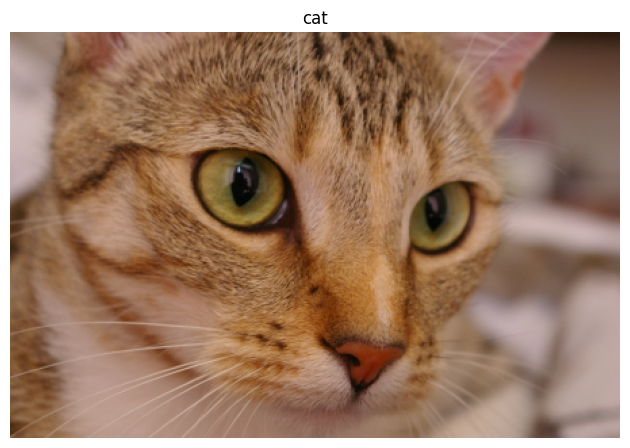

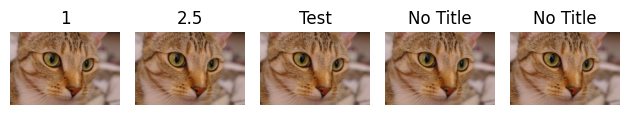

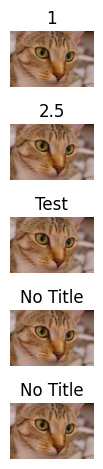

get_img_dtype(img)=dtype('uint8')
get_img_dtype(min_max_normalize(img))=dtype('float64')
get_img_dtype(normalize_255(img))=dtype('float64')
get_img_dtype(normalize_255(img).astype(np.float32))=dtype('float32')


In [ ]:
# Sample code for using above functions on a prepackaged image
import skimage.data
img = skimage.data.cat() # DONOT USE THIS FUNCTION / IMAGE FOR YOUR SUBMISSION. PLEASE USE YOUR OWN IMAGES.
show_image(img, dpi=100, title="cat")
show_image_subplot([img]*5, 1,5, titles=[1,2.5, "Test"],dpi=100)
show_image_subplot([img]*5, 5,1, titles=[1,2.5, "Test"],dpi=100)

# Printing out array types
print(f"{get_img_dtype(img)=}")
print(f"{get_img_dtype(min_max_normalize(img))=}")
print(f"{get_img_dtype(normalize_255(img))=}")
print(f"{get_img_dtype(normalize_255(img).astype(np.float32))=}")

# 1.0 Basic Image Operations

In this problem you will gain some experience with Numpy and OpenCV to perform basic image manipulations.

## 1.1 Combining two images

In [ ]:
def read_image(filename : str) -> np.ndarray:
    """
    write a function to read an image.
    return an opencv image / numpy array of shape H x W x C
    """
    # code here
    pass # remove `pass` and replace with `return ....` statement


In [ ]:
def resize_image(image :np.ndarray, size: tuple) -> np.ndarray :
    """
    resize image to a given size
    return the resized image as an numpy array
    """
    # code here
    pass # remove `pass` and replace with `return ....` statement

In [ ]:
def crop_image(image: np.ndarray, crop_window_size : tuple, crop_origin: tuple) -> np.ndarray :
    """
    image: np.ndarray
    crop_window_size: tuple comprising (width, height) of the cropped output
    crop_origin: tuple comprising (col, row) indices that mark the pixel around which you want to crop the image

    write a function that takes an image, crop_window_size ,and crop_origin and returns the cropped image
    """
    # code here

    pass # remove `pass` and replace with `return ....` statement

In [ ]:
def interleave_using_forloops(image_a: np.ndarray, image_b: np.ndarray) -> np.ndarray :
    """
    write code to inverleave image for Q1.1d
    """
    # code here
    pass # remove `pass` and replace with `return ....` statement


In [ ]:
def interleave_without_forloops(image_a : np.ndarray, image_b: np.ndarray) -> np.ndarray :
    """
    Write code to inverleave image for Q1.1e

    """
    # code here
    pass # remove `pass` and replace with `return ....` statement

In [ ]:
# please answer 1.1 here.


# 1.1a : read 2 images, display them

# 1.1b : resize and crop

# 1.1c : Create new image "C"

# 1.1d : Use loop to interleave images

# 1.1e : interleave images without loops



## 1.2 : Color spaces

In [ ]:
def convert_image_to_hsv(image: np.ndarray) -> np.ndarray :
    """
    write a code using opencv to convert image from RGB to HSV colorspace.
    You can later reuse this function for Q1.2b
    """
    # code here
    pass # remove `pass` and replace with `return ....` statement



In [ ]:
def threshold_using_rgb(image:np.ndarray, threshold_low=[0, 0, 0], threshold_high=[255,255,255]) -> np.ndarray :
    """
    image: rgb np.ndarray image
    threshold_low : lower values for threshold for r,g,b channels
    threshold_high : upper values for threshold for r,g,b channels
    return a thresholded RGB image
    """
    # write code for thresholding rgb image here
    # code here
    pass # remove `pass` and replace with `return ....` statement


In [ ]:
def threshold_using_hsv(image:np.ndarray, threshold_low=[0, 0, 0], threshold_high=[255,255,255]) -> np.ndarray :
    """
    image: rgb np.ndarray image
    threshold_low : lower values for threshold for h,s,v channels
    threshold_high : upper values for threshold for h,s,v channels
    return a thresholded HSV image
    """
    hsv_image = convert_image_to_hsv(image)
    # write code for thresholding hsv image here
    # code here
    pass # remove `pass` and replace with `return ....` statement


In [ ]:
# please answer 1.2

# 1.2a : RGB thresholding

# 1.2b : HSV thresholding

1.2c : Please write answer here. You can use code-cells for displaying images if you'd like.

# 2D Geometric Transforms

Geometric transformations are fundamental tools used in a variety of computer vision and computer graphics applications. In this problem, you will write your own code to warp images using 2D geometric transforms.

2.1a : Please write answer here.

2.1b : Please write answer here. IF you want you can also code this up for better understanding and visualization.


## 2.2  Write functions to produce transformation matrices.



In [ ]:
def translation_mtx(x, y):
    pass # remove `pass` and replace with `return ....` statement

def rotation_mtx(angle):
    pass # remove `pass` and replace with `return ....` statement

def similarity(x, y, scale, rotation):
    pass # remove `pass` and replace with `return ....` statement

def affine(a,b,c,d,e,f):
    pass # remove `pass` and replace with `return ....` statement

## 2.3 Warping an image

In [ ]:
def imwarp(image: np.ndarray, T: np.ndarray) -> np.ndarray :
    """
    Write a function that takes an image and transformation matrix as input
    and returns a transformed image
    """

    pass # remove `pass` and replace with `return ....` statement


In [ ]:
# 2.4 : Demonstrate your warping. Please write code and discuss solutions here.

# 3.0 Camera Matrix Computation

Write answers for this section below.

## 4.0 Relighting [ ELEC/COMP 546 ONLY ]


In [ ]:
def blend(image1 : np.ndarray, image2 : np.ndarray) -> np.ndarray:
    """
    I12_synth = I1 + I2
    """
    pass # remove `pass` and replace with `return ....` statement



In [ ]:
def show_differences(image_synth : np.ndarray, real_image : np.ndarray) -> np.ndarray:
    """
    D = I12_synth - I12.
    """
    pass # remove `pass` and replace with `return ....` statement

In [ ]:
# 4a, 4b, 4c, 4d Please write answer here


In [ ]:
# Feel free to add more code-cells or text-cells for any of the above questions!